#NBA game prediction

Asrith Biradavolu, Ankit Penmatcha, Abhijay Shukla


Member 1: Asrith Biradavolu, Contribution: 100% (We worked through each part together)

Member 2: Ankit Penmatcha, Contribution: 100% (We worked through each part together)

Member 3: Abhijay Shukla, Contribution: 100% (We worked through each part together)

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.

Asrith Biradavolu 5/7/2024
Ankit Penmatcha 5/7/2024
Abhijay Shukla 5/7/2024


Asrith Biradavolu: We worked through each component in this project as a group, discussing and contributing together as we moved along. For instance, we all worked together at the same time to find the data, prepare it, explore it, and develop the ML analysis.

Ankit Penmatcha: We worked through each component in this project as a group, discussing and contributing together as we moved along. For instance, we all worked together at the same time to find the data, prepare it, explore it, and develop the ML analysis.

Abhijay Shukla: We worked through each component in this project as a group, discussing and contributing together as we moved along. For instance, we all worked together at the same time to find the data, prepare it, explore it, and develop the ML analysis.

###Introduction

The overall objective of this project is to analyze game trends from thousands of basketball games from the years of 2004 to 2020.


This anyalsis provides valuable insight to teams on which stats seem to have a larger impact on winning, and improvments that are possible to be added to their team to increase their chance of winning. Millions of people watch basketball daily and being able to create an effective or new way to look at the data of sports games will enable not only a stronger understanding for the game, but also create a better understanding of how data can be percieved and used in a sports setting.

We will first be importing the important libraries that are going to be used in the project for data exploration.


*   Pandas
*   Numpy
*   Matplot
*   Scipy
*   sklearn





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

###Data Curation




The project begins by curating data from a Kaggle dataset containing NBA game statistics spanning from 2004 to 2020. Various datasets are imported, including game details, player information, team rankings, and team data. The team then preprocesses the data by converting data types, merging datasets, and handling missing values to ensure data uniformity and readiness for analysis.

There were multiple options public data options ranging from individual player data, to team season data, or playoff data. The best one that we were able to find is that of https://www.kaggle.com/datasets/nathanlauga/nba-games?resource=download. From this data we will manipualte it and use it to evaluate our original goal and try to find how this data can be used to predict the outcome of games.

We will now import all the csvs which contain several points of data into our enviorment. We will also print the start of each to make sure each dataset was uploaded properly with all columns.

In [ ]:
games_df = pd.read_csv('games.csv')
games_details_df = pd.read_csv('games_details.csv')
players_df = pd.read_csv('players.csv')
ranking_df = pd.read_csv('ranking.csv')
teams_df = pd.read_csv('teams.csv')


print("Games Dataset:")
print(games_df.head(1))
print("\nGames Details Dataset:")
print(games_details_df.head(1))
print("\nPlayers Dataset:")
print(players_df.head(1))
print("\nRanking Dataset:")
print(ranking_df.head(1))
print("\nTeams Dataset:")
print(teams_df.head(1))

<ipython-input-4-868ef4c7838a>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv('games_details.csv')


Games Dataset:
  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
0      46.0    1610612759     117.0        0.478        0.815         0.321   

   AST_away  REB_away  HOME_TEAM_WINS  
0      23.0      44.0               1  

[1 rows x 21 columns]

Games Details Dataset:
    GAME_ID       TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  22200477  1.610613e+09               SAS  San Antonio  1629641.0   

      PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  OREB  DREB  \
0  Romeo Langford    Romeo              F     NaN  18:06  ...   1.0   1.0   

   REB  AST  STL  BLK   TO   PF  PTS  PLUS_MINUS  
0  2.0  0.0  1.0  0.0  2.0  5.0  2.0  

We will now be changing the datatypes of some of the data that is given to us to allow for an easier method of anyalzing our data. The steps that we are doing are as follows

1.   We will be converting GAME_DATE_EST to a datetime object. This will allow us to more effectively use time ranges or sort anything when it comes into relation with the date of the game.
2.   We will be also changing other sections to the category datatype so that its all uniform and will help speed up operations as there are only a limited number of options for each of these sections.
3. We finally are merging the data all together into one uniform dataset call our master_df which means we will be using one large dataframe by using a join. This join will combine the datasets based on the team_id and thus make it all easily readible and workable. If you want to understand how joining and merging datasets work in a better manner here is a guide: https://pandas.pydata.org/docs/reference/api/pandas.merge.html


In [ ]:
games_df['GAME_DATE_EST'] = pd.to_datetime(games_df['GAME_DATE_EST'])


teams_df['ABBREVIATION'] = teams_df['ABBREVIATION'].astype('category')
teams_df['NICKNAME'] = teams_df['NICKNAME'].astype('category')
teams_df['CITY'] = teams_df['CITY'].astype('category')


datasets = {
   'games': games_df,
   'games_details': games_details_df,
   'players': players_df,
   'ranking': ranking_df,
   'teams': teams_df
}


master_df = pd.merge(games_df, teams_df, how='inner', left_on='HOME_TEAM_ID', right_on='TEAM_ID')


print("Merged Games Master DataFrame:")
print(master_df.head())
print(master_df.columns.tolist())

Merged Games Master DataFrame:
  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-19  22200457            Final    1610612740       1610612749   
2    2022-12-11  22200395            Final    1610612740       1610612756   
3    2022-12-09  22200384            Final    1610612740       1610612756   
4    2022-12-07  22200371            Final    1610612740       1610612765   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
0    2022    1610612740     126.0        0.484        0.926  ...   
1    2022    1610612740     119.0        0.424        0.708  ...   
2    2022    1610612740     129.0        0.581        0.750  ...   
3    2022    1610612740     128.0        0.511        0.800  ...   
4    2022    1610612740     104.0        0.459        0.783  ...   

   ABBREVIATION  NICKNAME  YEARFOUNDED         CITY                 ARENA  \
0           NOP  Pel

Another important thing within basketball is that of running averages for the previous set amount of games. The usual number that is picked within the NBA is that of 10 games which spans around 2 weeks. These averages indicate the average field goal percentage, free throw percentage, rebounds, and asits for the past 10 games. We will be using this information to create our Machine Learning model later on and is extremly important that we are able to create a results.csv which contains this training data. To do this we will be following the following steps:



1.   Iterate through each game.
2.   Find the date of the game and then find the previous 10 games for both the home and away team.
3.   Store the information in each row and then add it to a result dataframe that will have the result of the game, and then the averages for both the home and away team for the last 10 games.



In [ ]:
results_df = pd.DataFrame()
#Iterate through every game of the data set
for index, row in master_df.iterrows():

    #Get each teams id from the game we are trying to add
    home_team_id = row['TEAM_ID_home']
    away_team_id = row['TEAM_ID_away']

    #This will return the previous ten games for the home team and then store their averages
    home_team_games = master_df[(master_df['TEAM_ID'] == home_team_id) & (master_df['GAME_DATE_EST'] <= row['GAME_DATE_EST'])].sort_values(by='GAME_DATE_EST', ascending=False).head(10)

    home_team_avg_fg_pct = home_team_games['FG_PCT_home'].mean()
    home_team_avg_ft_pct = home_team_games['FT_PCT_home'].mean()
    home_team_avg_reb = home_team_games['REB_home'].mean()
    home_team_avg_ast = home_team_games['AST_home'].mean()


    #This will return the previous ten games for the away team and then store their averages
    away_team_games = master_df[(master_df['TEAM_ID'] == away_team_id) & (master_df['GAME_DATE_EST'] <= row['GAME_DATE_EST'])].sort_values(by='GAME_DATE_EST', ascending=False).head(10)

    away_team_avg_fg_pct = away_team_games['FG_PCT_away'].mean()
    away_team_avg_ft_pct = away_team_games['FT_PCT_away'].mean()
    away_team_avg_reb = away_team_games['REB_away'].mean()
    away_team_avg_ast = away_team_games['AST_away'].mean()


    #We are now curating this into a row that will be inserted into our result dataframe
    new_row = pd.DataFrame({
        'GAME_ID': [row['GAME_ID']],
        'GAME_DATE_EST': [row['GAME_DATE_EST']],
        'HOME_TEAM_ID': [home_team_id],
        'HOME_TEAM_SCORE': [row['PTS_home']],
        'AWAY_TEAM_ID': [away_team_id],
        'AWAY_TEAM_SCORE': [row['PTS_away']],
        'RESULT': [row['HOME_TEAM_WINS']],
        'HOME_TEAM_AVG_FG_PCT': [home_team_avg_fg_pct],
        'AWAY_TEAM_AVG_FG_PCT': [away_team_avg_fg_pct],
        'HOME_TEAM_AVG_FT_PCT': [home_team_avg_ft_pct],
        'AWAY_TEAM_AVG_FT_PCT': [away_team_avg_ft_pct],
        'HOME_TEAM_AVG_REB': [home_team_avg_reb],
        'AWAY_TEAM_AVG_REB': [away_team_avg_reb],
        'HOME_TEAM_AVG_AST': [home_team_avg_ast],
        'AWAY_TEAM_AVG_AST': [away_team_avg_ast]
    })

    results_df = pd.concat([results_df, new_row], ignore_index=True)
#output our results into a csv that will later be analyzed
results_df.to_csv('results.csv', index=False)

After we generate our new csv we will be creating it into a dataframe and then drop all the rows in which there is an NA or missing value. This will allow us to train our data normally without having to face any issues of invalid data types. As we can see there is at max a total of 99 na values in a collumn so in the total amount of columns, 26651, that removing those 99 values which is less than 1% will not make any impact on our total data.

In [ ]:
df = pd.read_csv('results.csv')
print(df.isna().sum())
print(len(df))
df = df.dropna(subset=['HOME_TEAM_AVG_FG_PCT', 'AWAY_TEAM_AVG_FG_PCT',
                       'HOME_TEAM_AVG_FT_PCT', 'AWAY_TEAM_AVG_FT_PCT',
                       'HOME_TEAM_AVG_REB', 'AWAY_TEAM_AVG_REB',
                       'HOME_TEAM_AVG_AST', 'AWAY_TEAM_AVG_AST', 'RESULT'])
print(len(df))

GAME_ID                  0
GAME_DATE_EST            0
HOME_TEAM_ID             0
HOME_TEAM_SCORE         99
AWAY_TEAM_ID             0
AWAY_TEAM_SCORE         99
RESULT                   0
HOME_TEAM_AVG_FG_PCT    55
AWAY_TEAM_AVG_FG_PCT    65
HOME_TEAM_AVG_FT_PCT    55
AWAY_TEAM_AVG_FT_PCT    65
HOME_TEAM_AVG_REB       55
AWAY_TEAM_AVG_REB       65
HOME_TEAM_AVG_AST       55
AWAY_TEAM_AVG_AST       65
dtype: int64
26651
26554


### Data Exploration

In this section we will be conducting different types of analysis and angles of the data to see what is reliable and also what the possible ideas for our machine learning section can be. We will be posing different quesitons in relation to the NBA and seeing with our data if our hypotheses are true or not.
Home Team Advantage: Moving into exploratory data exploration, we first investigate the existence of a home team advantage in NBA games. Using a chi-squared test, we find strong evidence suggesting that home teams have a significant advantage, as they tend to win more games than away teams.

1. Is there a home team advantage?


To determine this, we will use a chi squared test since the home and away teams and the wins are categorical data. We will be checking if there is a statistical difference between the number of home wins and nunmber of away wins.


Hypothesis test:


Null Hypothesis: Being the home team **does not** have a significant effect on the proportion of games won.


Alternative Hypothesis: Being the home team **does** have a significant effect on the proportion of games won.


Our alpha value is 0.05


In [ ]:
# The HOME_TEAM_WINS column has a 1 if the home team won, 0 if away team won
home_wins = master_df['HOME_TEAM_WINS'].sum()
away_wins = len(master_df) - home_wins
observed = [home_wins, away_wins]


# The expected is a 50/50 split of winning and losing on home games
expected = [len(master_df)/2, len(master_df)/2]


p = sci.chi2_contingency([observed, expected])[1]


print("Observed Home Wins: ", home_wins)
print("Observed Away Wins: ", away_wins)


print("P value: ", p)

Observed Home Wins:  15645
Observed Away Wins:  11006
P value:  2.1460600689357103e-90


Here, the P value is less than 0.05, much less in fact. This means the results are very unlikely to have happened by chance. We reject the null hypothesis in this case.


This suggests that teams are more likely to win if they are the home team, meaning that there is clearly a home team advantage after all.


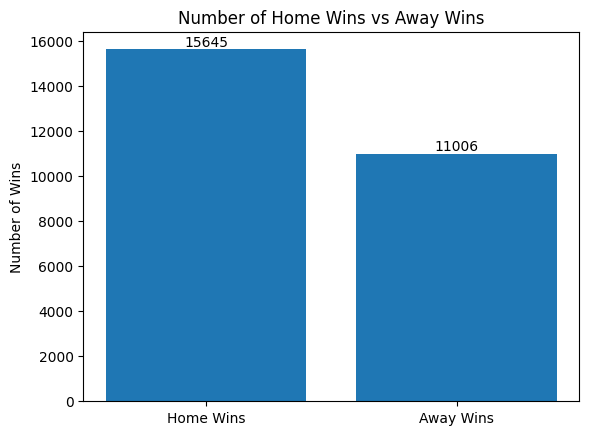

In [ ]:
counts = [home_wins, away_wins]


plt.bar(['Home Wins', 'Away Wins'], counts)
plt.title('Number of Home Wins vs Away Wins')
plt.ylabel('Number of Wins')
plt.text(0, counts[0], f'{counts[0]}', ha='center', va='bottom')
plt.text(1, counts[1], f'{counts[1]}', ha='center', va='bottom')
plt.show()

2. Do 2022 games have a higher average home field goal percentage than 2012 games? In other words, has the average home field goal percentage gone up?

Shooting Efficiency Trends: We  analyze trends in average home field goal percentage over the years. By conducting a two-sample t-test comparing 2012 and 2022 games, we discover a statistically significant increase in home field goal percentage, indicating a potential improvement in shooting efficiency over time.


To determine this, we will use a two sample t test since one sample is the 2012 games and the other is the 2022 games. Each sample size is large.


Hypothesis test:


Null Hypothesis: There is no difference in the average home field goal percentages between the 2012 games and 2012 games.


Alternative Hypothesis: There is a difference in the average home field goal percentages between the 2012 games and 2012 games.


Our alpha value is 0.05


In [ ]:
df_2012 = master_df[(master_df['SEASON'] == 2012)]
df_2022 = master_df[(master_df['SEASON'] == 2022)]


fg_pct_home_2012 = df_2012['FG_PCT_home']
fg_pct_home_2022 = df_2022['FG_PCT_home']


p2 = sci.ttest_ind(fg_pct_home_2012, fg_pct_home_2022, equal_var=False)[1]


print("P value: ", p2)

P value:  5.505524982366268e-07


Here, the P value is less than 0.05, which means the results are very unlikely to have happened by chance and we reject the null hypothesis in this case.
This suggests that there is a statistically significant difference in the average home field goal percentage between 2012 and 2022, and in this case, it is likely to have gone up, which is a pattern we can explore further.


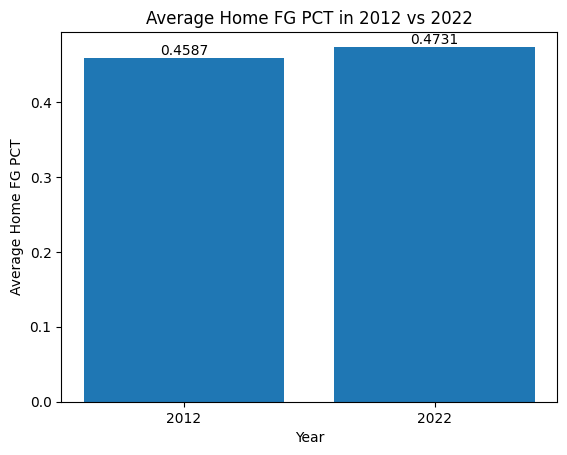

In [ ]:
years = ['2012', '2022']
avg_fg_pct_home_2012 = fg_pct_home_2012.mean()
avg_fg_pct_home_2022 = fg_pct_home_2022.mean()
averages = [avg_fg_pct_home_2012, avg_fg_pct_home_2022]


plt.bar(years, averages)
plt.title('Average Home FG PCT in 2012 vs 2022')
plt.xlabel('Year')
plt.ylabel('Average Home FG PCT')
plt.text(0, averages[0], f'{averages[0]:.4f}', ha='center', va='bottom')
plt.text(1, averages[1], f'{averages[1]:.4f}', ha='center', va='bottom')
plt.ylim(0, max(averages) + 0.02)


plt.show()



3. Do home teams have a higher 3pt% than away teams?


3pt Shooting Performance: Further analysis shows the difference in 3pt shooting percentages between home and away teams. Through another two-sample t-test, the team finds that home teams tend to have a higher average 3pt percentage compared to away teams, highlighting a potential advantage in long-range shooting when playing at home.

To determine this, we will use a two sample t test since one sample is the away teams and the other is the home teams and their respective percentages Each sample sizes is large.


Hypothesis test:
Null Hypothesis: There is no difference in the average home field goal percentages between the home teams and away teams.
Alternative Hypothesis: There is a difference in the average home field goal percentages between the away teams and **home** teams.


Our alpha value is 0.05





We filter out invalid values first.

In [ ]:
missing = master_df['FG3_PCT_away'].isna().sum()
print(f"Missing FG3_PCT_away: {missing} out of {len(master_df['FG3_PCT_away'])}")

missing = master_df['FG3_PCT_home'].isna().sum()
print(f"Missing FG3_PCT_home: {missing} out of {len(master_df['FG3_PCT_home'])}")

master_df_cleaned = master_df[np.isfinite(master_df['FG3_PCT_home'])]
master_df_cleaned = master_df[np.isfinite(master_df['FG3_PCT_away'])]

Missing FG3_PCT_away: 99 out of 26651
Missing FG3_PCT_home: 99 out of 26651


In [ ]:
home_3pt = master_df_cleaned['FG3_PCT_away']
away_3pt = master_df_cleaned['FG3_PCT_home']

home_3pt_filter = home_3pt[~np.isnan(home_3pt)]
away_3pt_filter = away_3pt[~np.isnan(away_3pt)]

t_value,p_value = sci.ttest_ind(home_3pt, away_3pt)

print("P value: ", p_value)

P value:  8.851423973149999e-12


We reject the null hypothesis since it is less than 0.05. This means there is a significant difference in 3pt percentages for home and away teams.





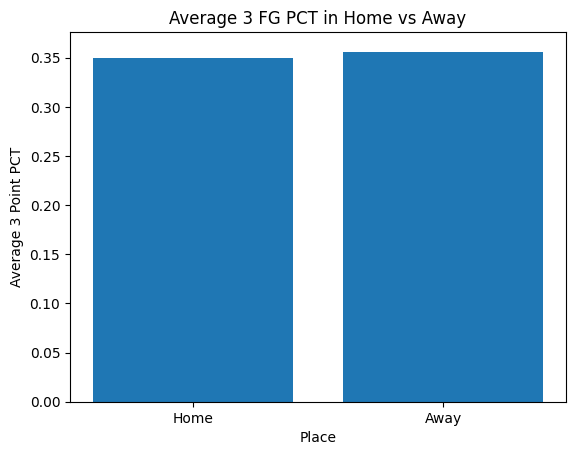

In [ ]:
places = ['Home', 'Away']
avg_home_3pt= home_3pt_filter.mean()
avg_away_3pt = away_3pt_filter.mean()
averages = [avg_home_3pt, avg_away_3pt]


plt.bar(places, averages)
plt.title('Average 3 FG PCT in Home vs Away')
plt.xlabel('Place')
plt.ylabel('Average 3 Point PCT')
plt.ylim(0, max(averages) + 0.02)
plt.show()



Our finding show that there are many factors that affect performance. For instance, we saw home team advantage, performance changes 10 years apart, and 3 point field goal percentages based on being the home or away team. As we continue to explore trends, we may hopefully be able to use these trends to predict future values. Although we are not sure of this currently, this is something we plan to continue looking into and trying. The next steps will show an attempt and the methodoly of finding out if such results are possible.

### Machine Learning

We now want to utalize machine learning to see if there is a way to predict the outcome of a game with the data that we are given. Although machine learning is a term that covers multiple topics and is essentially just different algorithms for a computer to "learn" and devolp a connection, we will only be using one technique for our tutorial today.


The technique that we will be using today is that of logistical regression. Logistic regression is a statistical model that is used for binary classification tasks. It predicts the probability of the dependent variable based on the indepdent variabels. The model outputs probabilities that in our case will be a win or loss. If you want to understand the math and more in depth here is a link for further understanding https://www.geeksforgeeks.org/understanding-logistic-regression/

We chose this technique as we can feed our algorithm several different features or data points. In our case these going to be Field goal percentage, Free throw percentage, asists and rebounds. We are using all the possible features in the data set that dont directly indicate the result of the game. Below will be how we have trained our model and the results and usage of it.

To create our training model we first have to define all the important parts taht we have in our running averages. That would be the averages of all statsitcal categories for each team. After we have done as such we will simply do a logistical regression in which we will let the algorithm first train with a certain set of data and use the other non-training data to see if the results of our training will bear any fruit or not.

Initial Logistic Regression Model: Transitioning to machine learning, we utilize logistic regression to predict game outcomes based on various team performance metrics. The initial model achieves a moderate accuracy of approximately 62.5%, indicating the potential of using historical game data to predict future outcomes.



In [ ]:
#getting all features or categories
features = ['HOME_TEAM_AVG_FG_PCT', 'AWAY_TEAM_AVG_FG_PCT',
            'HOME_TEAM_AVG_FT_PCT', 'AWAY_TEAM_AVG_FT_PCT',
            'HOME_TEAM_AVG_REB', 'AWAY_TEAM_AVG_REB',
            'HOME_TEAM_AVG_AST', 'AWAY_TEAM_AVG_AST']
#The target or result we are trying to predict. in this case result symolizes the home team winning and is always a 1 or 0
target = 'RESULT'


#splitting the data and sets so it can be used for training and testing
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


#This is where we create the logistic regression adn then fit it or train it
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


#now we are testing our data and outputing the results of what happened
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.6254942572020336
Confusion Matrix:
[[ 593 1555]
 [ 434 2729]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.28      0.37      2148
           1       0.64      0.86      0.73      3163

    accuracy                           0.63      5311
   macro avg       0.61      0.57      0.55      5311
weighted avg       0.61      0.63      0.59      5311



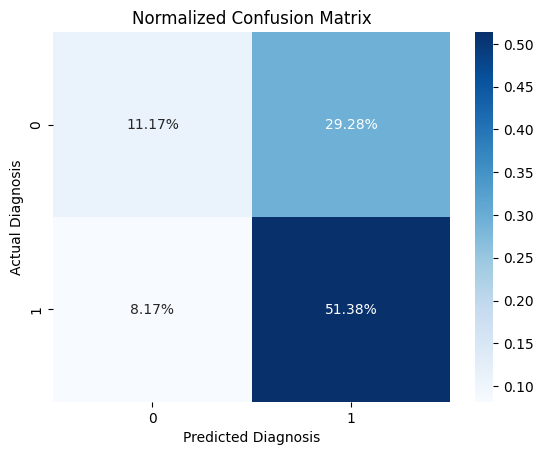

In [ ]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.title('Normalized Confusion Matrix')

y_prob = model.predict_proba(X_test)[:, 1]

plt.show()

While achieving a commendable accuracy rate, the initial logistic regression model could be further optimized through feature selection or hyperparameter tuning. Exploring different machine learning algorithms or ensemble techniques may also enhance predictive performance and provide more robust models for game outcome prediction.

As shown from the results above, about 63% of our predictions are correct, which is a fairly moderate rate.

The confusion matrix, which represents losing as 0 and winning as 1, shows that about 51% of the time the model correctly predicted the home team would win. About 29% of the time, the model predicted the home team would win, but ended up being incorrect. About 11% of the time, the model correctly predicted the home team would lose. About 8% of the time, the modely predicted the home team would lose, but ended up being incorrect.
Thus, based on these results, the model seems to bias towards predicting the home team will win.

The precision for class 0 was 58%, meaning of all the instances where it predicted the home team would lose, it was correct 58% of the time.
The recall for class 0 was 28%, meaning of all the instances where the home team ended up losing, our model only predicted them correctly 28% of the time.
The F1 score for class 0 was 37%, which shows a fairly poor performance for this class.

The precision for class 1 was 64%, meaning of all the instances where it predicted the home team would win, it was correct 64% of the time.
The recall for class 1 was 86%, meaning of all the instances where the home team ended up losing, our model predicted them correctly 86% of the time.
The F1 score for class 1 was 73%, which is much higher than class 0 and indicated a better performance for this class.

We will now try to do this same method but instead of having 8 features we will try to combine the two features that are the same but on different teams and try to see if that will make it more or less accurate to predict. We do this by finding the difference in each of the statistical categories between the two teams. If the value is postive that would mean that the home team is better in that category and if it is negative that would indicate the away team is doing well in that category

Enhanced Model with Feature Engineering: We explore enhancing the model by incorporating features such as differences in statistical categories between home and away teams.

In [ ]:
#getting all features or categories by finding the difference
df['AVG_FG_PCT'] = df['HOME_TEAM_AVG_FG_PCT'] - df['AWAY_TEAM_AVG_FG_PCT']
df['AVG_FT_PCT'] = df['HOME_TEAM_AVG_FT_PCT'] - df['AWAY_TEAM_AVG_FT_PCT']
df['AVG_REB'] = df['HOME_TEAM_AVG_REB'] - df['AWAY_TEAM_AVG_REB']
df['AVG_AST'] = df['HOME_TEAM_AVG_AST'] - df['AWAY_TEAM_AVG_AST']

features = ['AVG_FG_PCT', 'AVG_FT_PCT',
            'AVG_REB', 'AVG_AST', ]
#The target or result we are trying to predict. in this case result symolizes the home team winning and is always a 1 or 0
target = 'RESULT'


#splitting the data and sets so it can be used for training and testing
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


#This is where we create the logistic regression adn then fit it or train it
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


#now we are testing our data and outputing the results of what happened
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.5970627000564865
Confusion Matrix:
[[ 127 2021]
 [ 119 3044]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.06      0.11      2148
           1       0.60      0.96      0.74      3163

    accuracy                           0.60      5311
   macro avg       0.56      0.51      0.42      5311
weighted avg       0.57      0.60      0.48      5311



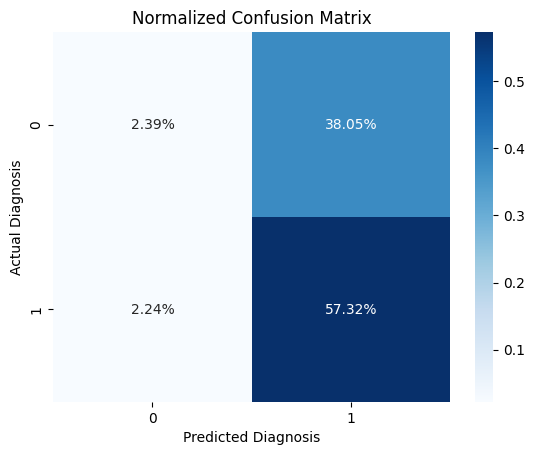

In [ ]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.title('Normalized Confusion Matrix')

y_prob = model.predict_proba(X_test)[:, 1]

plt.show()

As shown from the results above, about 60% of our predictions are correct, which is slightly less than the last iteration.

The confusion matrix, which represents losing as 0 and winning as 1, shows that about 57% of the time the model correctly predicted the home team would win. About 38% of the time, the model predicted the home team would win, but ended up being incorrect. About 2% of the time, the model correctly predicted the home team would lose. About 2% of the time, the modely predicted the home team would lose, but ended up being incorrect. Thus, based on these results, the model seems to be even more bias towards predicting the home team will win.

The precision for class 0 was 52%, meaning of all the instances where it predicted the home team would lose, it was correct 52% of the time. The recall for class 0 was 6%, meaning of all the instances where the home team ended up losing, our model only predicted them correctly 6% of the time. The F1 score for class 0 was 11%, which shows a poor performance for this class.

The precision for class 1 was 60%, meaning of all the instances where it predicted the home team would win, it was correct 60% of the time. The recall for class 1 was 96%, meaning of all the instances where the home team ended up losing, our model predicted them correctly 96% of the time. The F1 score for class 1 was 74%.

Thus, our new model seems to heavily bias towards predicting wins, which is indicated by the high false positive rate and low precisions.

Despite this feature engineering, the accuracy of the model slightly decreases to around 59.7%, suggesting the need for further refinement or exploration of alternative machine learning algorithms. Our exploration of feature engineering highlights the importance of incorporating domain knowledge and creative approaches in predictive modeling. Fine-tuning feature engineering techniques or experimenting with different feature combinations could yield improvements in predictive performance and model interpretability.


#Insights and Conclusions:

For an uninformed reader this project is an intro to the application of data analysis and machine learning when used for NBA game prediction. This analyzes game trends and uses data to predict game outcomes. It walks the reader through each step of the analytical process from how we curated the data to the actual ML model.
In our data citation we explain the public datasets and how platforms like Kaggle are utilized in it for our dataset retrieval. We import the data set and then for our exploratory data analysis we use tests to read into the metrics. We used chi squared tests and two sample t tests to explain null and alternative hypotheses to interpret statistical results.
Our ML model uses  a logistic regression to predict game outcomes.

For an informed reader we also delve deeper into the logistic regression and have code snippets that breakdown how we built the model and how we analyzed the data. This regression helps us with finding binary outcomes such as a win and a loss through logistics functions, odd rations and coefficient analysis through the use of sckit-learn, feature engineering techniques, and cross validation for model validation. For our model evaluations and interpretation we utilized metrics such as accuracy, precision, and recall for our data.

Overall, all readers are likely to find the project interesting as it gives a strong understanding of concepts in sports analytics and helps them get involved in the technical intricacies of predictive analysis in sports.

In conclusion, the project provides valuable insights into NBA game trends and performance metrics. It confirms the presence of a significant home team advantage, observes trends in shooting efficiency over time, and explores the impact of location on shooting performance. Additionally, the project demonstrates the potential of machine learning techniques, such as logistic regression, in predicting game outcomes based on historical data, albeit with room for improvement and further experimentation.
In addition to providing insights into specific NBA game trends and predictive modeling techniques, the project underscores the interdisciplinary nature of sports analytics. Collaborating with domain experts, such as basketball coaches or statisticians, could offer unique perspectives and enhance the effectiveness of predictive models. Furthermore, ongoing advancements in data collection technologies and machine learning algorithms present opportunities for continuous refinement and innovation in sports analytics.